<a href="https://colab.research.google.com/github/jellyho/AI_Learning_jellyho/blob/main/7_Data_Preprocessing_Advanced2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. PCA로 주성분 추출하기 (비지도 차원 축소)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

테스트 셋 분리하고 표준화

In [15]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

from sklearn.preprocessing import StandardScaler as SC
sc = SC()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

공분산 행렬 구해서 고윳값과 고유벡터 구하기, 그리고 그 중에서 분산이 제일 높은 벡터 두개만 구해서 투영 행렬을 구성하고 투영해서 N*2 차원의 행렬로 변경, 산점도 그리기

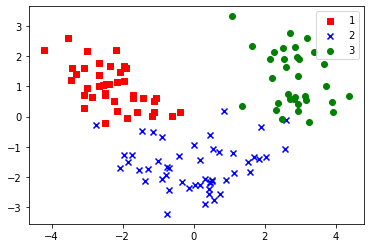

In [18]:
cov_matrix = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for i, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==i, 0], X_train_pca[y_train==i, 1], c=c, label=i, marker=m)

plt.legend(loc='best')
plt.show()

사이킷런으로 사용하기

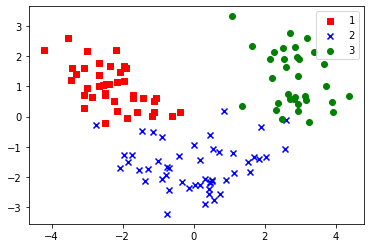

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for i, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==i, 0], X_train_pca[y_train==i, 1], c=c, label=i, marker=m)

plt.legend(loc='best')
plt.show()

이 상태로 선형 분류기를 사용하면 잘 분류가 될 것 같다.

2. LDA로 데이터 압축하기